<a href="https://colab.research.google.com/github/farazzashraf/CreditCard-FraudDetection/blob/main/CreditCard_FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data = pd.read_csv("drive/MyDrive/Credit-Card-Fraud/fraudTrain.csv")
test_data = pd.read_csv("drive/MyDrive/Credit-Card-Fraud/fraudTest.csv")

In [4]:
train_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
test_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

<ipython-input-7-5e30e69d4a1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


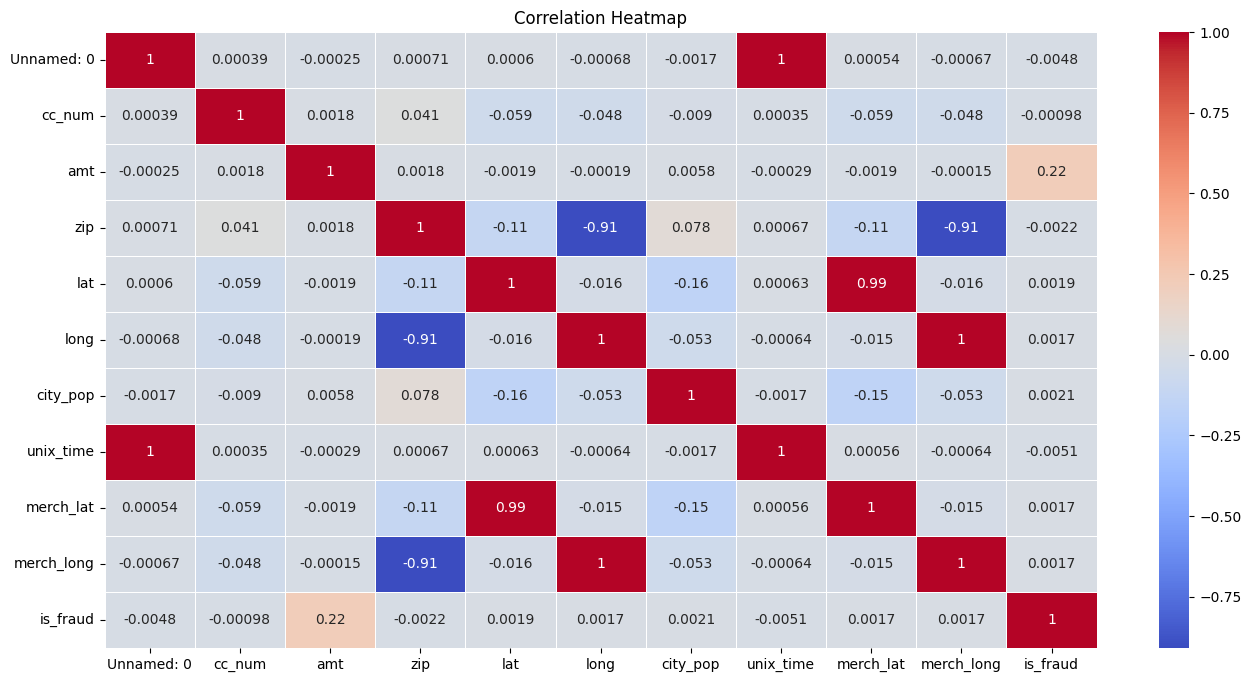

In [7]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])

# Extract year, month, and day features
train_data['trans_year'] = train_data['trans_date_trans_time'].dt.year
train_data['trans_month'] = train_data['trans_date_trans_time'].dt.month
train_data['trans_day'] = train_data['trans_date_trans_time'].dt.day
train_data['dob_year'] = train_data['dob'].dt.year
train_data['dob_month'] = train_data['dob'].dt.month
train_data['dob_day'] = train_data['dob'].dt.day

In [9]:
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['dob'] = pd.to_datetime(test_data['dob'])

# Extract year, month, and day features
test_data['trans_year'] = test_data['trans_date_trans_time'].dt.year
test_data['trans_month'] = test_data['trans_date_trans_time'].dt.month
test_data['trans_day'] = test_data['trans_date_trans_time'].dt.day
test_data['dob_year'] = test_data['dob'].dt.year
test_data['dob_month'] = test_data['dob'].dt.month
test_data['dob_day'] = test_data['dob'].dt.day

In [10]:
train_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,dob_year,dob_month,dob_day
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1325376018,36.011293,-82.048315,0,2019,1,1,1988,3,9
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1325376044,49.159047,-118.186462,0,2019,1,1,1978,6,21
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1325376051,43.150704,-112.154481,0,2019,1,1,1962,1,19
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1325376076,47.034331,-112.561071,0,2019,1,1,1967,1,12
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1325376186,38.674999,-78.632459,0,2019,1,1,1986,3,28


In [11]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_year', 'trans_month',
       'trans_day', 'dob_year', 'dob_month', 'dob_day'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

text_columns = ['merchant', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']

for column in text_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])


In [13]:
test_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_year', 'trans_month',
       'trans_day', 'dob_year', 'dob_month', 'dob_day'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

text_columns = ['merchant', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']

for column in text_columns:
    test_data[column] = label_encoder.fit_transform(test_data[column])


In [15]:
train_data = pd.get_dummies(train_data, columns=['category'], prefix=['cat'], drop_first=True)

In [16]:
test_data = pd.get_dummies(test_data, columns=['category'], prefix=['cat'], drop_first=True)

In [17]:
columns_to_drop = ['trans_date_trans_time', 'dob', 'trans_num', 'unix_time']
train_data = train_data.drop(columns=columns_to_drop)

In [18]:
columns_to_drop = ['trans_date_trans_time', 'dob', 'trans_num', 'unix_time']
test_data = test_data.drop(columns=columns_to_drop)

In [19]:
from sklearn.model_selection import train_test_split

x = train_data.drop('is_fraud', axis = 1)
y = train_data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

report = classification_report(y_test, y_pred)
print("Classification Report: ")
print(report)

Accuracy: 0.9977056702720419
[[257701    114]
 [   481   1039]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.90      0.68      0.78      1520

    accuracy                           1.00    259335
   macro avg       0.95      0.84      0.89    259335
weighted avg       1.00      1.00      1.00    259335



In [21]:
test_labels = test_data["is_fraud"]

# Make prediictions on the test data
test_predictions = model.predict(test_data.drop('is_fraud', axis=1))

# Evaluate the model's performance on the test data
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

test_confusion = accuracy_score(test_labels, test_predictions)
print(f"Test Confusion Matrix: {test_confusion}")

test_report = classification_report(test_labels, test_predictions)
print(f'Test Classification report: {test_report}')

# Count the number of fraudulent (1) and non-fraudulent (0) transactions
num_fraudulent = sum(test_predictions)
num_non_fraudulent = len(test_predictions) - num_fraudulent

# Print the counts
print("Number of Non-fraudulent transactions:", num_non_fraudulent)
print("Number of Fraudulent transactions:", num_fraudulent)

Test Accuracy: 0.9976408940489708
Test Confusion Matrix: 0.9976408940489708
Test Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.84      0.48      0.61      2145

    accuracy                           1.00    555719
   macro avg       0.92      0.74      0.81    555719
weighted avg       1.00      1.00      1.00    555719

Number of Non-fraudulent transactions: 554475
Number of Fraudulent transactions: 1244


In [22]:
class_counts = test_data['is_fraud'].value_counts()

# Print the counts
print("Number of Non-fraudulent transactions (Class 0):", class_counts[0])
print("Number of Fraudulent transactions (Class 1):", class_counts[1])


Number of Non-fraudulent transactions (Class 0): 553574
Number of Fraudulent transactions (Class 1): 2145


In [23]:
train_data.columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 37 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1296675 non-null  int64  
 1   cc_num              1296675 non-null  int64  
 2   merchant            1296675 non-null  int64  
 3   amt                 1296675 non-null  float64
 4   first               1296675 non-null  int64  
 5   last                1296675 non-null  int64  
 6   gender              1296675 non-null  int64  
 7   street              1296675 non-null  int64  
 8   city                1296675 non-null  int64  
 9   state               1296675 non-null  int64  
 10  zip                 1296675 non-null  int64  
 11  lat                 1296675 non-null  float64
 12  long                1296675 non-null  float64
 13  city_pop            1296675 non-null  int64  
 14  job                 1296675 non-null  int64  
 15  merch_lat      

In [24]:
# Sample data for testing
sample_data = {
    'Unnamed: 0': [1],
    'cc_num': [1234567890123456],
    'merchant': [123],
    'amt': [100.0],
    'first': [456],
    'last': [789],
    'gender': [0],
    'street': [234],
    'city': [567],
    'state': [890],
    'zip': [12345],
    'lat': [40.7128],
    'long': [-74.0060],
    'city_pop': [8000000],
    'job': [1234],
    'merch_lat': [40.7128],
    'merch_long': [-74.0060],
    'trans_year': [2023],
    'trans_month': [5],
    'trans_day': [15],
    'dob_year': [1980],
    'dob_month': [2],
    'dob_day': [25],
    'cat_food_dining': [0],
    'cat_gas_transport': [0],
    'cat_grocery_net': [1],
    'cat_grocery_pos': [0],
    'cat_health_fitness': [0],
    'cat_home': [0],
    'cat_kids_pets': [0],
    'cat_misc_net': [0],
    'cat_misc_pos': [0],
    'cat_personal_care': [0],
    'cat_shopping_net': [0],
    'cat_shopping_pos': [0],
    'cat_travel': [0]
}

# Create a DataFrame from the sample data
sample_df = pd.DataFrame(sample_data)

# Make predictions on the sample data using your trained model
sample_predictions = model.predict(sample_df)

# Display the predictions
print("Sample Predictions:")
for prediction in sample_predictions:
    if prediction == 0:
        print("Non-fraudulent transaction")
    else:
        print("Fraudulent transaction")


Sample Predictions:
Non-fraudulent transaction
